# **Scenario 2 (Dashboard)**

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, fftfreq

In [20]:
# Updated file path with raw string to handle backslashes correctly
file_path = r'C:\Users\dawwi\OneDrive\Desktop\IOT\IOT\data\scenario 2 2024-10-21 19-29-43.xls'

# Reading the Excel file
xls = pd.ExcelFile(file_path)

# Get all sheet names to understand the structure of the file
sheet_names = xls.sheet_names
sheet_names

['Accelerometer', 'Gyroscope', 'Location', 'Metadata Device', 'Metadata Time']

In [21]:
# Reading the 'Accelerometer' sheets into dataframes
df_accelerometer = pd.read_excel(file_path, sheet_name='Accelerometer', header=[0])
df_gyroscope = pd.read_excel(file_path, sheet_name='Gyroscope', header=[0])

In [22]:
# Strip extra spaces from column names for both dataframes
df_accelerometer.columns = df_accelerometer.columns.str.strip()
df_gyroscope.columns = df_gyroscope.columns.str.strip()

In [23]:
# Display the first few rows to check the data
print(df_accelerometer.head())
print(df_gyroscope.head())

   Time (s)         x         y         z
0  0.021466  4.333505  6.519411  3.663129
1  0.041455  4.520253  6.442797  4.857835
2  0.061444  4.604050  6.950367  6.033388
3  0.081463  4.996699  7.316680  5.719748
4  0.101452  5.420473  6.519411  5.087678
   Time (s)         x         y         z
0  0.025463 -0.268781  0.002443  0.229074
1  0.045483 -0.238848 -0.072082  0.191201
2  0.065472 -0.070860  0.086743  0.081856
3  0.085461  0.019548  0.123395 -0.020159
4  0.105450 -0.010996 -0.062308 -0.141110


In [24]:
# Check the column names of both sheets
print("Accelerometer Columns: ", df_accelerometer.columns)
print("Gyroscope Columns: ", df_gyroscope.columns)

Accelerometer Columns:  Index(['Time (s)', 'x', 'y', 'z'], dtype='object')
Gyroscope Columns:  Index(['Time (s)', 'x', 'y', 'z'], dtype='object')


In [25]:
# Now accessing the 'x', 'y', 'z' columns should work
acc_x = df_accelerometer['x'].values
acc_y = df_accelerometer['y'].values
acc_z = df_accelerometer['z'].values

gyr_x = df_gyroscope['x'].values
gyr_y = df_gyroscope['y'].values
gyr_z = df_gyroscope['z'].values

# **No. 1 Plot Accelerometer and gyroscope scenario 1 driver**

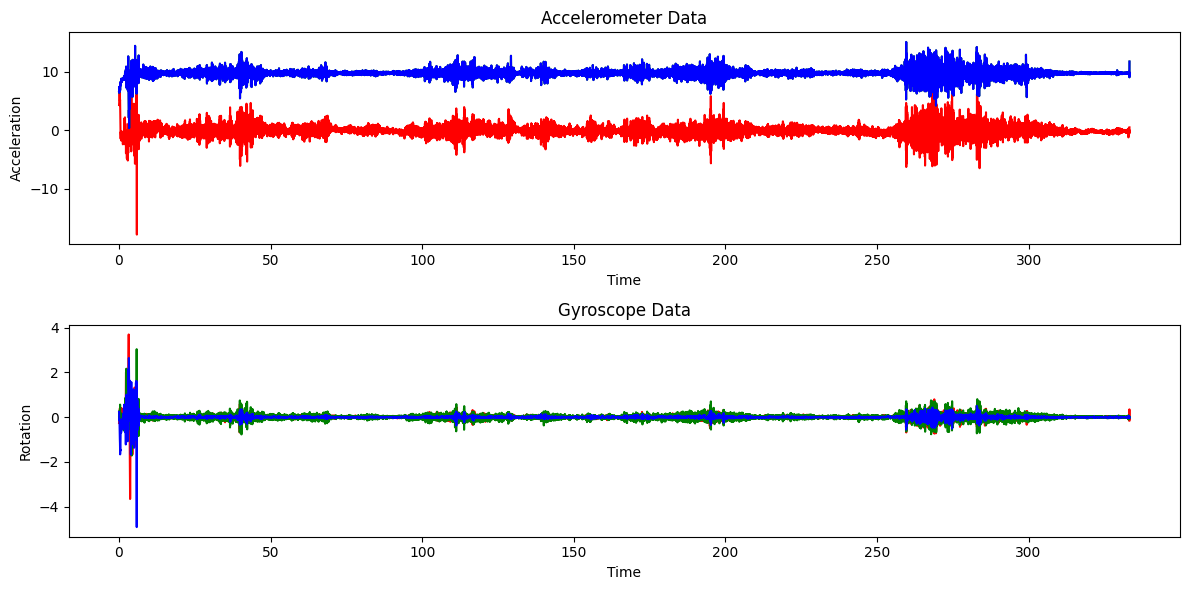

In [26]:
# Plot Accelerometer data (assuming columns for x, y, z axes are available)
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(df_accelerometer['Time (s)'], acc_x, label='X-axis', color='r')
plt.plot(df_accelerometer['Time (s)'], acc_y, label='Y-axis', color='g')
plt.plot(df_accelerometer['Time (s)'], acc_y, label='Z-axis', color='b')
plt.title('Accelerometer Data')
plt.xlabel('Time')
plt.ylabel('Acceleration')

# Plot Gyroscope data (assuming columns for x, y, z axes are available)
plt.subplot(2, 1, 2)
plt.plot(df_gyroscope['Time (s)'], gyr_x, label='X-axis', color='r')
plt.plot(df_gyroscope['Time (s)'], gyr_y, label='Y-axis', color='g')
plt.plot(df_gyroscope['Time (s)'], gyr_z, label='Z-axis', color='b')
plt.title('Gyroscope Data')
plt.xlabel('Time')
plt.ylabel('Rotation')

# Show the plots
plt.tight_layout()
plt.show()

# **No. 2 Plot Spectrum Accelerometer and Spectrum Gyroscope**

In [27]:
# Define the FFT function
def compute_fft(signal, sampling_rate=50):
    N = len(signal)
    yf = fft(signal)
    xf = fftfreq(N, 1/sampling_rate)
    return xf, np.abs(yf)

In [28]:
#FFT for every axis
acc_x_freq, acc_x_spectrum = compute_fft(acc_x)
acc_y_freq, acc_y_spectrum = compute_fft(acc_y)
acc_z_freq, acc_z_spectrum = compute_fft(acc_z)

gyr_x_freq, gyr_x_spectrum = compute_fft(gyr_x)
gyr_y_freq, gyr_y_spectrum = compute_fft(gyr_y)
gyr_z_freq, gyr_z_spectrum = compute_fft(gyr_z)

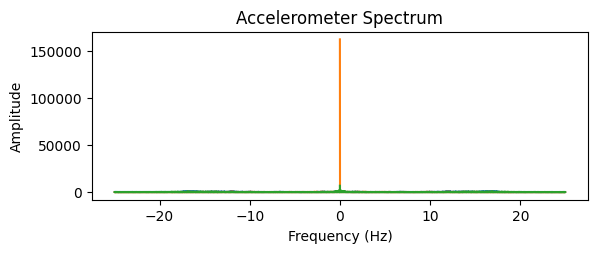

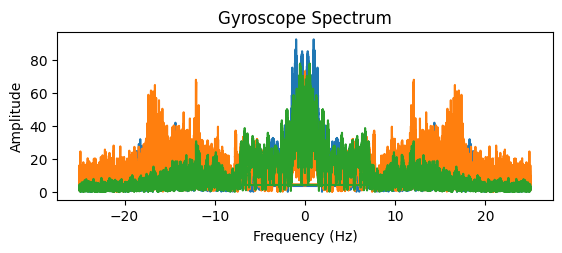

In [29]:
#subplot 1: accelerometer spectrum
plt.subplot(2, 1, 1)
plt.plot(acc_x_freq, acc_x_spectrum, label='acc_x')
plt.plot(acc_y_freq, acc_y_spectrum, label='acc_y')
plt.plot(acc_z_freq, acc_z_spectrum, label='acc_z')
plt.title('Accelerometer Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

#subplot 2: gyroscope spectrum
plt.subplot(2, 1, 1)
plt.plot(gyr_x_freq, gyr_x_spectrum, label='gyr_x')
plt.plot(gyr_y_freq, gyr_y_spectrum, label='gyr_y')
plt.plot(gyr_z_freq, gyr_z_spectrum, label='gyr_z')
plt.title('Gyroscope Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()